In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.io import imread_collection, imsave
from skimage.feature import hog
from skimage import exposure

# Summary

For this EDA notebook, I will be looking primarily at my smaller class of images which contain broken glass.

While the project is mostly focussed on detecting broken windows on cars for break ins, I'm finding that while I have plenty of car stock images, the ones focused on broken windows are smaller. Because of this reason, I'm trying to train my model on detecting broken glass period to gather a larger dataset.

In [6]:
imgs = imread_collection('./images/glass/*')

# First 9 and last 9 images

In this section I am showing the first and last images of the broken glass imageset

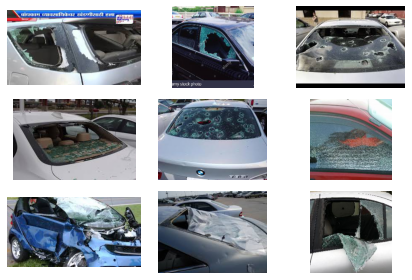

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3)
ax = axes.ravel()

for i in range(9):
    ax[i].imshow(imgs[i]);
    ax[i].axis('off')

plt.tight_layout()
plt.show()

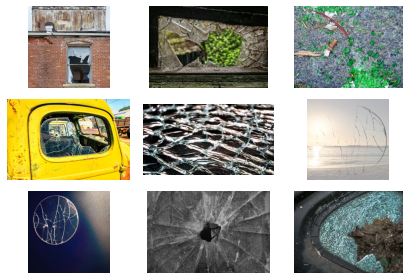

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3)
ax = axes.ravel()

for i in range(9):
    ax[i].imshow(imgs[-(i+1)]);
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

# HOG

After researching computer vision preprocessing techniques, I frequently see that the Histogram of Oriented Gradients is used. In this section I am visualizing what that looks like.

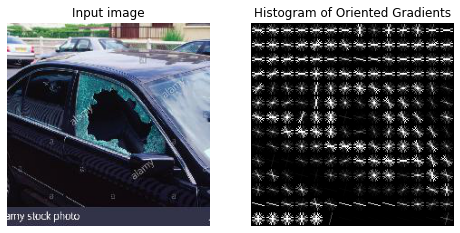

In [16]:
img_ind = 1 #image to view in hog

fd, hog_image = hog(imgs[img_ind], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(4, 4), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(imgs[img_ind], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

After looking at images, I suspect my model might have trouble differentiating with large holes in the glass or will try to pick up on circular objects with rough jagged edges

# Preprocessing

Trying to see what resizing and grayscaling my images look like. This step reduces the size of the dataset making any models much quicker.

In [ ]:
grays = [rgb2gray(img) for img in imgs]

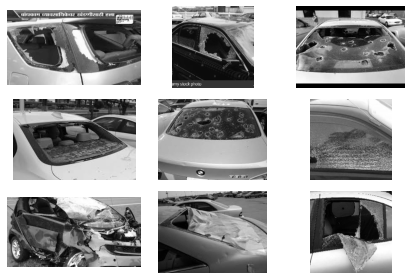

In [90]:
fig, axes = plt.subplots(nrows=3, ncols=3)
ax = axes.ravel()

for i in range(9):
    ax[i].imshow(grays[i], cmap='gray');
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

In [91]:
grays = [resize(img, (128,128)) for img in grays]

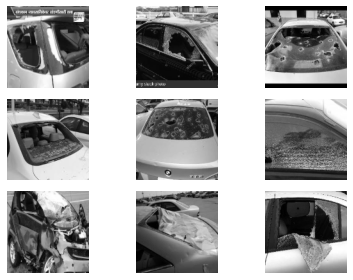

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=3)
ax = axes.ravel()

for i in range(9):
    ax[i].imshow(grays[i], cmap='gray');
    ax[i].axis('off')

plt.tight_layout()
plt.show()